In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 8

In [21]:
college = pd.read_csv('College.csv')
college = college.set_index(college.columns[0])
del college.index.name
print(college.columns)
print(college.shape)
college.head()

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')
(777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### R's `summary()`

In [28]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### R's `pairs()`

<IPython.core.display.Javascript object>


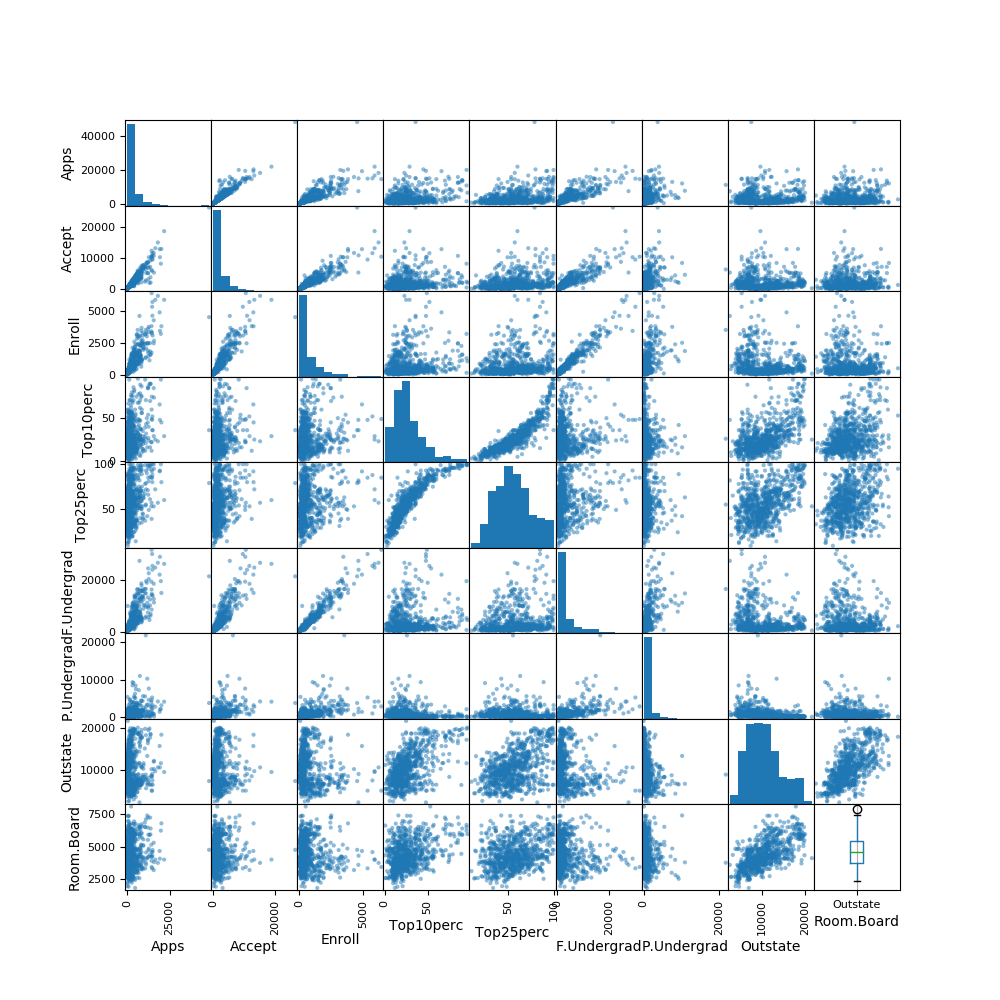

In [39]:
scatter = pd.plotting.scatter_matrix(college.iloc[:, :10], figsize = (10, 10))

### Side-by-side boxplots

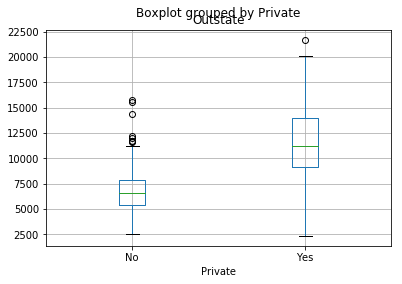

In [46]:
%matplotlib inline
boxplot = college.boxplot(column = 'Outstate', by = 'Private')

### Outstate vs elite

In [67]:
college['Elite'] = (college.Top10perc > 50).map({True: 'Yes', False: 'No'})
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

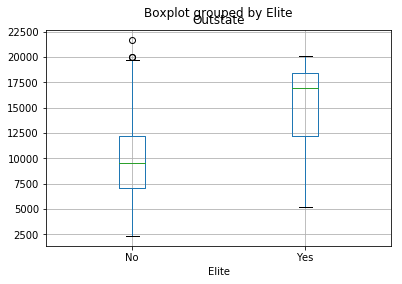

In [68]:
boxplot = college.boxplot(column = 'Outstate', by = 'Elite')

### 4x4 Histograms

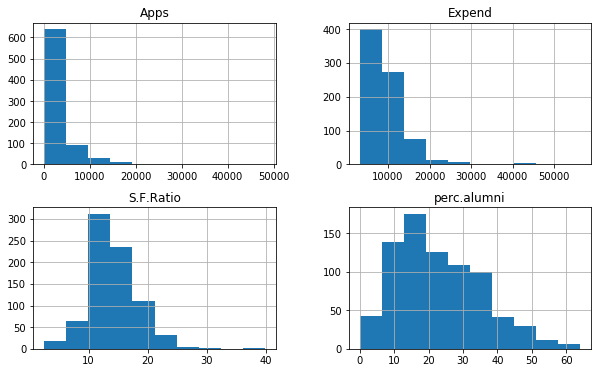

In [86]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
scatter = college[['Apps', 'perc.alumni', 'S.F.Ratio', 'Expend']].hist(ax = ax)

## Problem 9

In [92]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [99]:
pd.concat([auto[:10], auto[85:]]).describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,24.409317,5.378882,187.680124,2936.807453,15.700621,77.130435,1.596273
std,7.913357,1.657398,100.120925,810.987533,2.706436,3.131849,0.815572
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,2216.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.500000,2797.500000,15.500000,77.000000,1.000000
75%,30.650000,6.000000,250.000000,3516.000000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


## Problem 10

In [107]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [108]:
boston.data.shape

(506, 13)

In [178]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

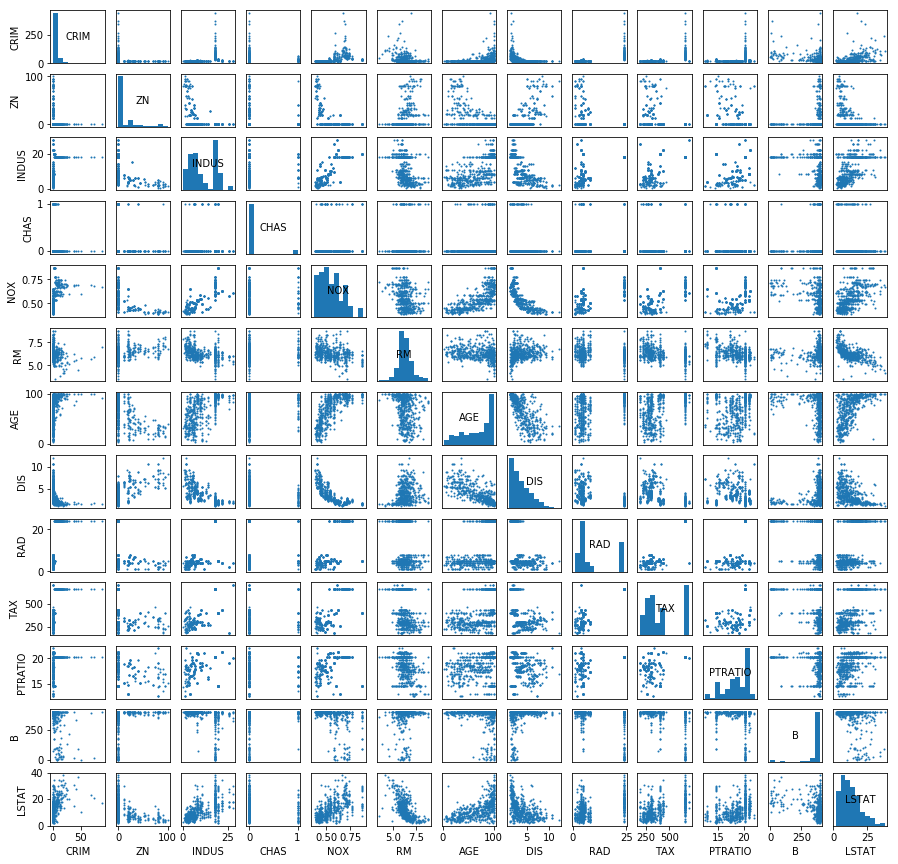

In [191]:
import itertools
fig, axes = plt.subplots(nrows = 13, ncols = 13, figsize = (15, 15))

for row, facets in enumerate(axes):
    for col, facet in enumerate(facets):
        if row == col:
            facet.annotate(boston.feature_names[row], (0.5, 0.5), ha = 'center', va = 'center', xycoords = 'axes fraction')
            facet.hist(boston.data[:, row])
        else:
            facet.scatter(boston.data[:, col], boston.data[:, row], s = 1)
        facet.set_xlabel(boston.feature_names[col])
        facet.set_ylabel(boston.feature_names[row])
        
        facet.xaxis.set_visible(False)
        facet.yaxis.set_visible(False)
        if row == len(facets) - 1:
            facet.xaxis.set_visible(True)
        if col == 0:
            facet.yaxis.set_visible(True)

In [205]:
pd.Series(boston.data[np.argmin(boston.target), :], )

0      38.3518
1       0.0000
2      18.1000
3       0.0000
4       0.6930
5       5.4530
6     100.0000
7       1.4896
8      24.0000
9     666.0000
10     20.2000
11    396.9000
12     30.5900
dtype: float64

In [206]:
print('# suburbs bounding Charles River: {}'.format(boston.data[:, 3].sum()))
print('Median pupil-teacher ratio: {}'.format(np.median(boston.data[:, 10])))
print('Lowest median value of owner-occupied homes: {}'.format(np.min(boston.target)))
print("This suburb's data:")
print(pd.DataFrame({'column': boston.feature_names, 'value': boston.data[np.argmin(boston.target), :]}))

# suburbs bounding Charles River: 35.0
Median pupil-teacher ratio: 19.05
Lowest median value of owner-occupied homes: 5.0
This suburb's data:
     column     value
0      CRIM   38.3518
1        ZN    0.0000
2     INDUS   18.1000
3      CHAS    0.0000
4       NOX    0.6930
5        RM    5.4530
6       AGE  100.0000
7       DIS    1.4896
8       RAD   24.0000
9       TAX  666.0000
10  PTRATIO   20.2000
11        B  396.9000
12    LSTAT   30.5900


In [211]:
print('No. suburbs w/ >7 rooms per dwelling: {}'.format(np.sum(boston.data[:, 5] > 7)))
print('No. suburbs w/ >7 rooms per dwelling: {}'.format(np.sum(boston.data[:, 5] > 8)))

No. suburbs w/ >7 rooms per dwelling: 64
No. suburbs w/ >7 rooms per dwelling: 13
